# Exploratory Data Analysis (EDA) - Emotions Dataset

This notebook provides comprehensive exploratory data analysis of the emotions training dataset.

## Analysis Sections:
1. **Dataset Overview** - Basic statistics and structure
2. **Class Distribution** - Emotion label analysis
3. **Text Length Analysis** - Character and word count distributions
4. **Vocabulary Analysis** - Unique words and vocabulary richness
5. **Word Frequency Analysis** - Most common words per emotion
6. **Word Clouds** - Visual representation of emotion-specific vocabulary
7. **N-gram Analysis** - Common phrases (bigrams, trigrams)
8. **Text Complexity Metrics** - Linguistic diversity measures
9. **Sample Text Inspection** - Example texts from each emotion
10. **Statistical Summary** - Key insights and recommendations


## 1. Import Required Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.util import ngrams
import warnings

warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Download NLTK resources
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

print("✅ Libraries imported successfully")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")


✅ Libraries imported successfully
Pandas version: 2.3.3
NumPy version: 2.2.5


## 2. Load Training Data


In [2]:
# Load training data
df = pd.read_csv('./data/train.csv')

print(f"✅ Dataset loaded successfully")
print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")


✅ Dataset loaded successfully
Dataset shape: (16000, 2)
Columns: ['text', 'label']


## 3. Dataset Overview


In [3]:
# Display first few rows
print("\n📊 First 10 rows of the dataset:")
df.head(10)



📊 First 10 rows of the dataset:


,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3
5,ive been feeling a little burdened lately wasn...,0
6,ive been taking or milligrams or times recomme...,5
7,i feel as confused about life as a teenager or...,4
8,i have been with petronas for years i feel tha...,1
9,i feel romantic too,2


In [4]:
# Dataset information
print("\n📋 Dataset Information:")
df.info()



📋 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16000 non-null  object
 1   label   16000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 250.1+ KB


In [5]:
# Basic statistics
print("\n📈 Statistical Summary:")
df.describe(include='all')



📈 Statistical Summary:


,text,label
count,16000,16000.000000
unique,15969,NaN
top,im still not sure why reilly feels the need to...,NaN
freq,2,NaN
mean,NaN,1.565937
std,NaN,1.501430
min,NaN,0.000000
25%,NaN,0.000000
50%,NaN,1.000000
75%,NaN,3.000000


In [6]:
# Check for missing values
print("\n🔍 Missing Values:")
missing = df.isnull().sum()
print(missing)
print(f"\nTotal missing values: {missing.sum()}")



🔍 Missing Values:
text     0
label    0
dtype: int64

Total missing values: 0


In [7]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\n🔍 Duplicate rows: {duplicates} ({duplicates/len(df)*100:.2f}%)")

if duplicates > 0:
    print("\nSample duplicate entries:")
    display(df[df.duplicated(keep=False)].head(10))



🔍 Duplicate rows: 1 (0.01%)

Sample duplicate entries:


,text,label
4975,i feel more adventurous willing to take risks ...,1
13846,i feel more adventurous willing to take risks ...,1


## 4. Emotion Label Mapping & Distribution


In [8]:
# Define emotion label mapping
emotion_mapping = {
    0: 'Sadness',
    1: 'Joy',
    2: 'Love',
    3: 'Anger',
    4: 'Fear',
    5: 'Surprise'
}

# Create emotion name column for better visualization
df['emotion_name'] = df['label'].map(emotion_mapping)

print("\n🏷️ Emotion Label Mapping:")
for label, emotion in emotion_mapping.items():
    print(f"  {label} → {emotion}")



🏷️ Emotion Label Mapping:
  0 → Sadness
  1 → Joy
  2 → Love
  3 → Anger
  4 → Fear
  5 → Surprise


In [9]:
# Class distribution
print("\n📊 Class Distribution:")
class_counts = df['emotion_name'].value_counts().sort_index()
class_percentages = (class_counts / len(df) * 100).round(2)

distribution_df = pd.DataFrame({
    'Emotion': class_counts.index,
    'Count': class_counts.values,
    'Percentage': class_percentages.values
})

display(distribution_df)

# Check for class imbalance
max_ratio = class_counts.max() / class_counts.min()
print(f"\n⚖️ Class imbalance ratio (max/min): {max_ratio:.2f}")
if max_ratio > 3:
    print("⚠️ Warning: Significant class imbalance detected!")
else:
    print("✅ Classes are relatively balanced")



📊 Class Distribution:


,Emotion,Count,Percentage
0,Anger,2159,13.49
1,Fear,1937,12.11
2,Joy,5362,33.51
3,Love,1304,8.15
4,Sadness,4666,29.16
5,Surprise,572,3.58



⚖️ Class imbalance ratio (max/min): 9.37
⚠️ Warning: Significant class imbalance detected!


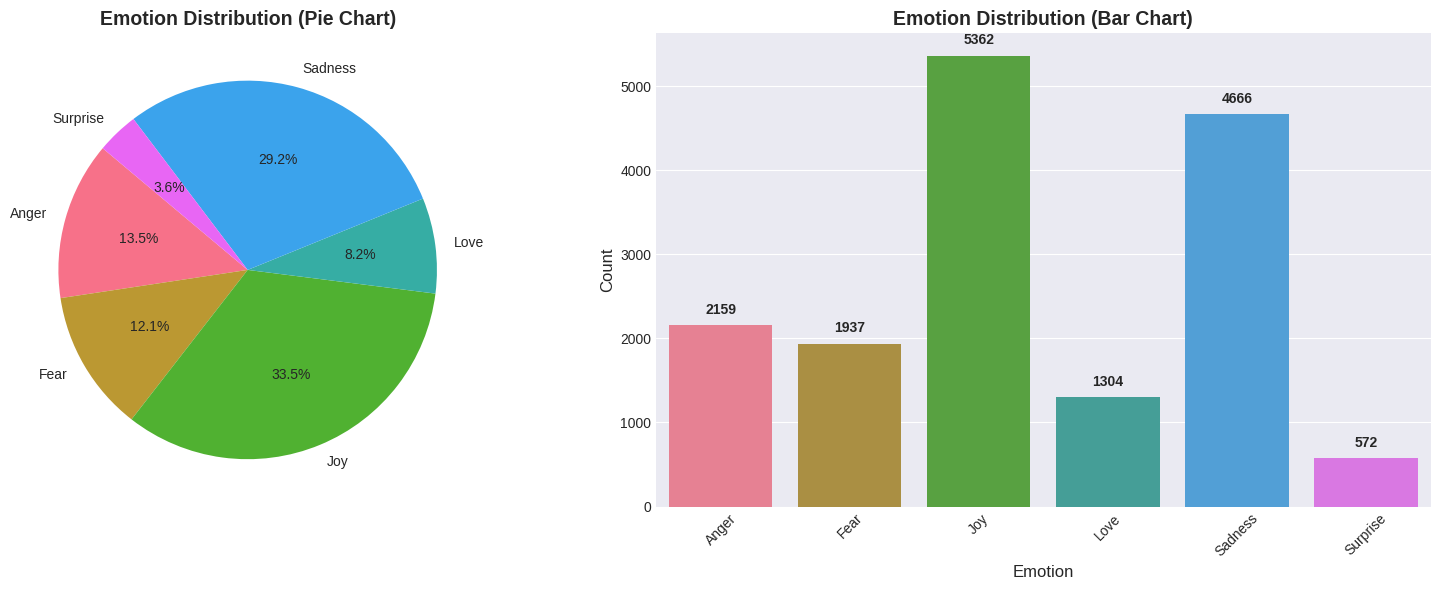

In [10]:
# Visualize class distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Pie chart
colors = sns.color_palette('husl', len(class_counts))
axes[0].pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%', 
            startangle=140, colors=colors)
axes[0].set_title('Emotion Distribution (Pie Chart)', fontsize=14, fontweight='bold')

# Bar chart
sns.barplot(x=class_counts.index, y=class_counts.values, ax=axes[1], palette='husl')
axes[1].set_title('Emotion Distribution (Bar Chart)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Emotion', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

# Add count labels on bars
for i, v in enumerate(class_counts.values):
    axes[1].text(i, v + 100, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


## 5. Text Length Analysis


In [11]:
# Calculate text statistics
df['text_length'] = df['text'].str.len()
df['word_count'] = df['text'].str.split().str.len()
df['avg_word_length'] = df['text'].apply(lambda x: np.mean([len(word) for word in x.split()]))
df['unique_words'] = df['text'].apply(lambda x: len(set(x.split())))
df['unique_word_ratio'] = df['unique_words'] / df['word_count']

print("✅ Text features calculated")


✅ Text features calculated


In [12]:
# Overall text length statistics
print("\n📏 Overall Text Length Statistics:")
print(f"  Character count - Mean: {df['text_length'].mean():.2f}, Median: {df['text_length'].median():.2f}")
print(f"  Character count - Min: {df['text_length'].min()}, Max: {df['text_length'].max()}")
print(f"  Word count - Mean: {df['word_count'].mean():.2f}, Median: {df['word_count'].median():.2f}")
print(f"  Word count - Min: {df['word_count'].min()}, Max: {df['word_count'].max()}")
print(f"  Average word length - Mean: {df['avg_word_length'].mean():.2f}")
print(f"  Unique word ratio - Mean: {df['unique_word_ratio'].mean():.2f}")



📏 Overall Text Length Statistics:
  Character count - Mean: 96.85, Median: 86.00
  Character count - Min: 7, Max: 300
  Word count - Mean: 19.17, Median: 17.00
  Word count - Min: 2, Max: 66
  Average word length - Mean: 4.15
  Unique word ratio - Mean: 0.91


In [13]:
# Text length statistics by emotion
print("\n📊 Text Length Statistics by Emotion:")
length_stats = df.groupby('emotion_name')[['text_length', 'word_count', 'avg_word_length']].agg(['mean', 'median', 'std'])
display(length_stats.round(2))



📊 Text Length Statistics by Emotion:


text_length               word_count                \
                    mean median    std       mean median    std   
emotion_name                                                      
Anger              96.91   85.0  57.68      19.23   17.0  11.43   
Fear               96.12   85.0  55.19      18.84   17.0  10.89   
Joy                98.55   89.0  55.03      19.50   18.0  10.77   
Love              104.03   94.0  55.15      20.70   19.0  10.83   
Sadness            92.55   80.0  56.09      18.36   16.0  11.04   
Surprise          101.68   88.5  57.25      19.97   18.0  11.03   

             avg_word_length               
                        mean median   std  
emotion_name                               
Anger                   4.15   4.10  0.59  
Fear                    4.23   4.17  0.58  
Joy                     4.14   4.08  0.55  
Love                    4.10   4.06  0.54  
Sadness                 4.15   4.08  0.60  
Surprise                4.18   4.12  0.57

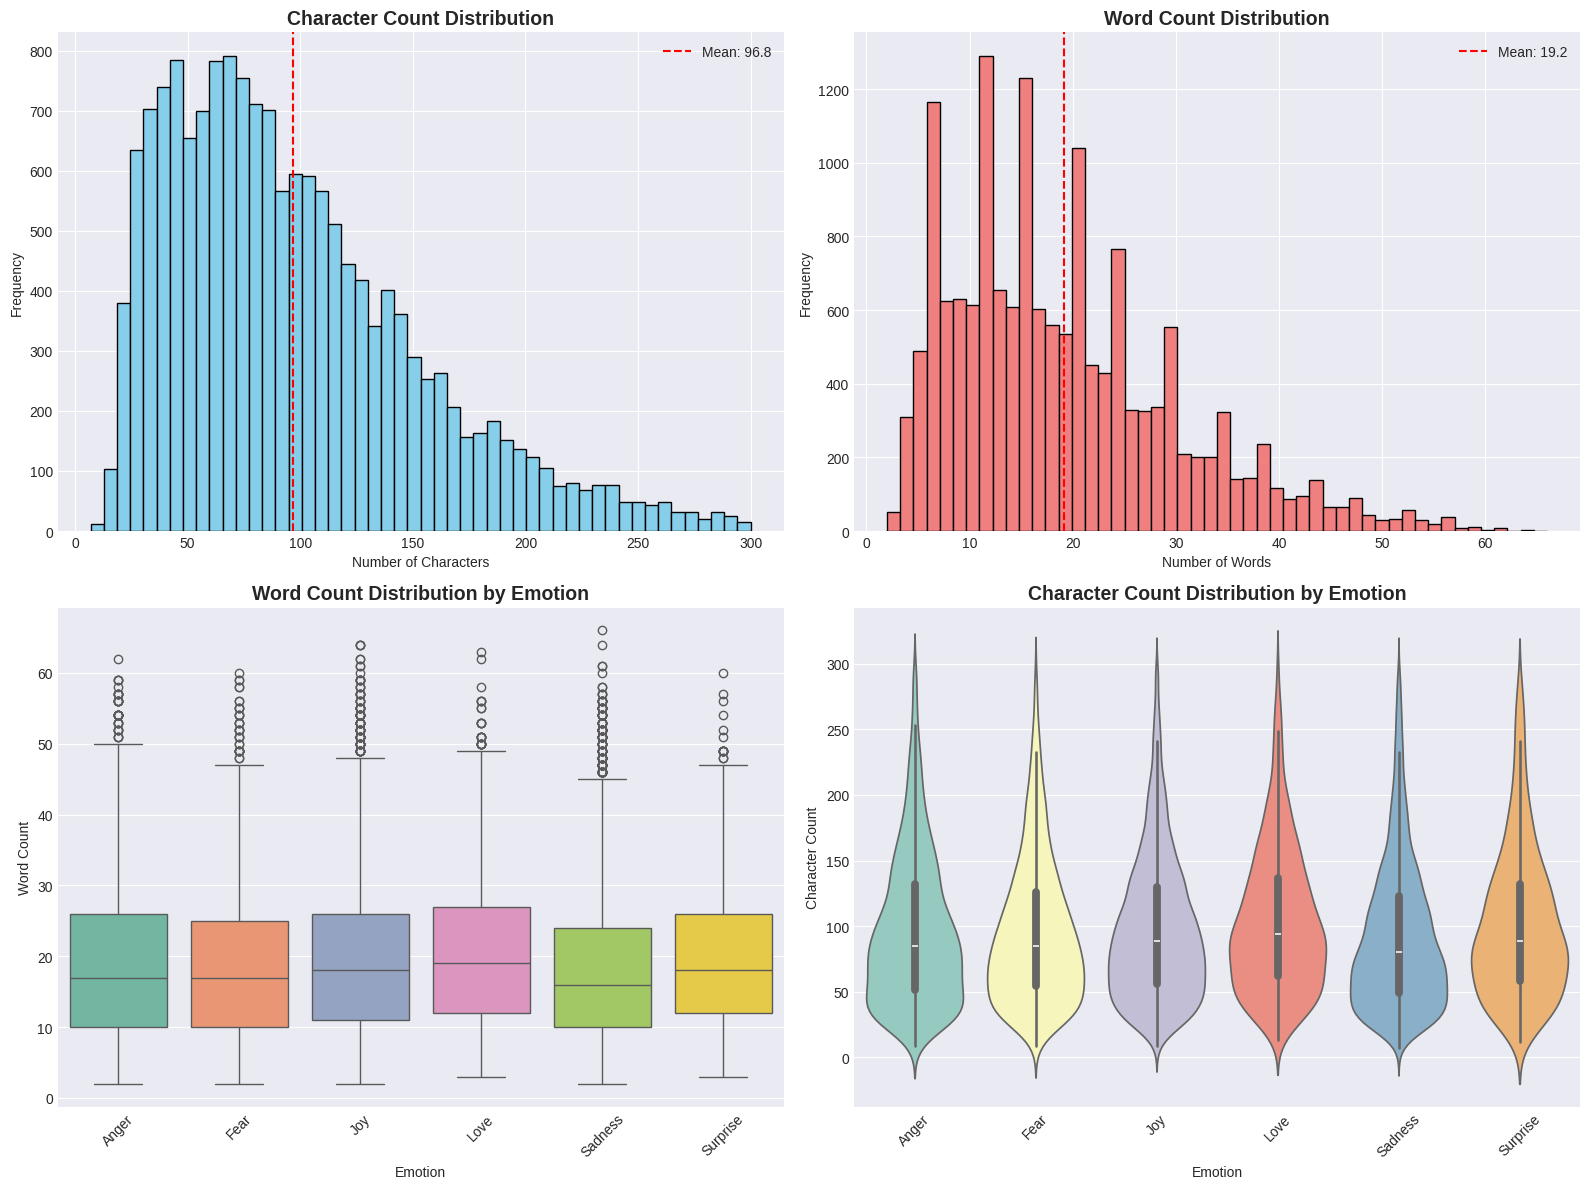

In [14]:
# Visualize text length distributions
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Character count distribution
axes[0, 0].hist(df['text_length'], bins=50, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Character Count Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Number of Characters')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(df['text_length'].mean(), color='red', linestyle='--', label=f"Mean: {df['text_length'].mean():.1f}")
axes[0, 0].legend()

# Word count distribution
axes[0, 1].hist(df['word_count'], bins=50, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Word Count Distribution', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Number of Words')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].axvline(df['word_count'].mean(), color='red', linestyle='--', label=f"Mean: {df['word_count'].mean():.1f}")
axes[0, 1].legend()

# Word count by emotion (boxplot)
df_sorted = df.sort_values('emotion_name')
sns.boxplot(data=df_sorted, x='emotion_name', y='word_count', ax=axes[1, 0], palette='Set2')
axes[1, 0].set_title('Word Count Distribution by Emotion', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Emotion')
axes[1, 0].set_ylabel('Word Count')
axes[1, 0].tick_params(axis='x', rotation=45)

# Character count by emotion (violin plot)
sns.violinplot(data=df_sorted, x='emotion_name', y='text_length', ax=axes[1, 1], palette='Set3')
axes[1, 1].set_title('Character Count Distribution by Emotion', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Emotion')
axes[1, 1].set_ylabel('Character Count')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [15]:
# Calculate vocabulary statistics
all_words = ' '.join(df['text']).lower().split()
total_words = len(all_words)
unique_words = len(set(all_words))
vocab_richness = unique_words / total_words

print("\n📚 Vocabulary Statistics:")
print(f"  Total words: {total_words:,}")
print(f"  Unique words: {unique_words:,}")
print(f"  Vocabulary richness: {vocab_richness:.4f}")

# Most common words overall
word_freq = Counter(all_words)
most_common = word_freq.most_common(20)

print("\n🔤 Top 20 Most Common Words:")
for i, (word, count) in enumerate(most_common, 1):
    print(f"  {i:2d}. {word:15s} - {count:6,} times")



📚 Vocabulary Statistics:
  Total words: 306,661
  Unique words: 15,212
  Vocabulary richness: 0.0496

🔤 Top 20 Most Common Words:
   1. i               - 25,859 times
   2. feel            - 11,183 times
   3. and             -  9,589 times
   4. to              -  8,972 times
   5. the             -  8,370 times
   6. a               -  6,200 times
   7. feeling         -  5,112 times
   8. that            -  5,112 times
   9. of              -  4,990 times
  10. my              -  4,283 times
  11. in              -  3,433 times
  12. it              -  3,127 times
  13. like            -  2,908 times
  14. so              -  2,527 times
  15. for             -  2,431 times
  16. im              -  2,430 times
  17. me              -  2,309 times
  18. but             -  2,255 times
  19. was             -  2,227 times
  20. have            -  2,224 times


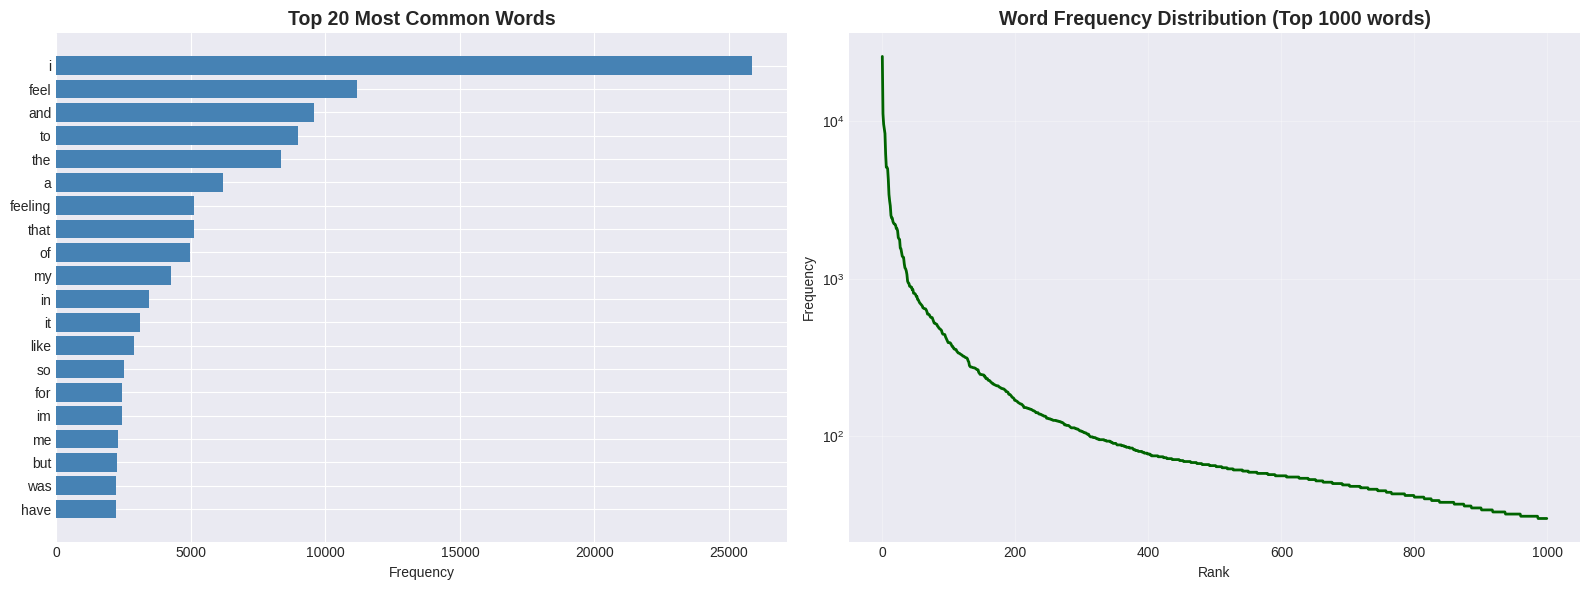

In [16]:
# Visualize most common words
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart of top 20 words
words, counts = zip(*most_common)
axes[0].barh(range(len(words)), counts, color='steelblue')
axes[0].set_yticks(range(len(words)))
axes[0].set_yticklabels(words)
axes[0].invert_yaxis()
axes[0].set_title('Top 20 Most Common Words', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Frequency')

# Word frequency distribution (log scale)
freq_values = sorted(word_freq.values(), reverse=True)
axes[1].plot(freq_values[:1000], color='darkgreen', linewidth=2)
axes[1].set_title('Word Frequency Distribution (Top 1000 words)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Rank')
axes[1].set_ylabel('Frequency')
axes[1].set_yscale('log')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [17]:
# Vocabulary size by emotion
print("\n📊 Vocabulary Statistics by Emotion:")
vocab_by_emotion = {}

for emotion in emotion_mapping.values():
    emotion_texts = df[df['emotion_name'] == emotion]['text']
    emotion_words = ' '.join(emotion_texts).lower().split()
    vocab_by_emotion[emotion] = {
        'total_words': len(emotion_words),
        'unique_words': len(set(emotion_words)),
        'vocab_richness': len(set(emotion_words)) / len(emotion_words)
    }

vocab_df = pd.DataFrame(vocab_by_emotion).T
display(vocab_df.style.format({
    'total_words': '{:,.0f}',
    'unique_words': '{:,.0f}',
    'vocab_richness': '{:.4f}'
}))



📊 Vocabulary Statistics by Emotion:


,total_words,unique_words,vocab_richness
Sadness,"85,677","7,008",0.0818
Joy,"104,549","8,645",0.0827
Love,"26,993","3,839",0.1422
Anger,"41,517","4,814",0.1160
Fear,"36,502","4,397",0.1205
Surprise,"11,423","2,168",0.1898


## 7. Most Common Words by Emotion


In [18]:
# Get top words for each emotion
print("\n🎯 Top 10 Most Common Words by Emotion:\n")

for emotion in emotion_mapping.values():
    emotion_texts = df[df['emotion_name'] == emotion]['text']
    emotion_words = ' '.join(emotion_texts).lower().split()
    emotion_word_freq = Counter(emotion_words)
    top_words = emotion_word_freq.most_common(10)
    
    print(f"\n{emotion}:")
    for i, (word, count) in enumerate(top_words, 1):
        print(f"  {i:2d}. {word:15s} - {count:5,} times")



🎯 Top 10 Most Common Words by Emotion:


Sadness:
   1. i               - 7,635 times
   2. feel            - 3,299 times
   3. and             - 2,692 times
   4. to              - 2,335 times
   5. the             - 2,155 times
   6. a               - 1,656 times
   7. feeling         - 1,523 times
   8. of              - 1,422 times
   9. that            - 1,299 times
  10. my              - 1,245 times

Joy:
   1. i               - 8,518 times
   2. feel            - 3,928 times
   3. and             - 3,273 times
   4. to              - 3,232 times
   5. the             - 2,991 times
   6. a               - 2,120 times
   7. that            - 1,905 times
   8. of              - 1,651 times
   9. feeling         - 1,539 times
  10. my              - 1,378 times

Love:
   1. i               - 2,120 times
   2. feel            -   929 times
   3. and             -   902 times
   4. to              -   860 times
   5. the             -   780 times
   6. a               -   571 times


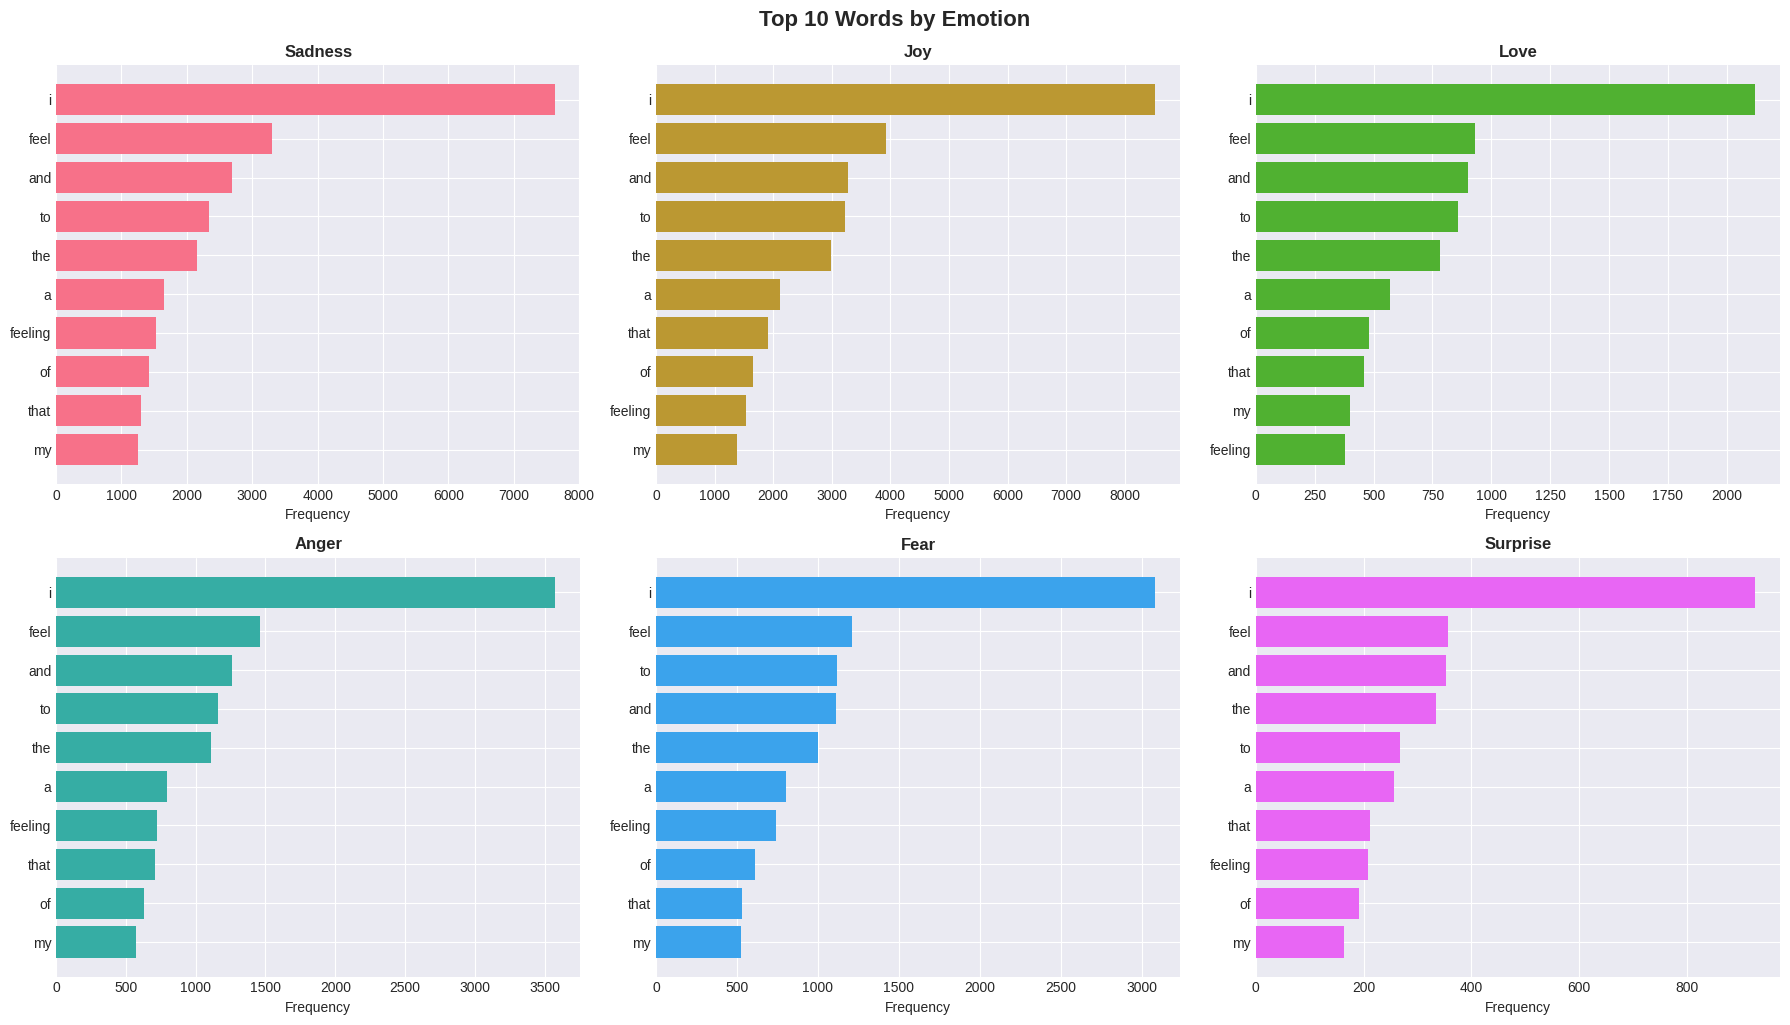

In [19]:
# Visualize top words by emotion
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, emotion in enumerate(emotion_mapping.values()):
    emotion_texts = df[df['emotion_name'] == emotion]['text']
    emotion_words = ' '.join(emotion_texts).lower().split()
    emotion_word_freq = Counter(emotion_words)
    top_words = emotion_word_freq.most_common(10)
    
    words, counts = zip(*top_words)
    axes[idx].barh(range(len(words)), counts, color=sns.color_palette('husl', 6)[idx])
    axes[idx].set_yticks(range(len(words)))
    axes[idx].set_yticklabels(words)
    axes[idx].invert_yaxis()
    axes[idx].set_title(f'{emotion}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Frequency', fontsize=10)

plt.tight_layout()
plt.suptitle('Top 10 Words by Emotion', fontsize=16, fontweight='bold', y=1.02)
plt.show()


## 8. Word Clouds by Emotion


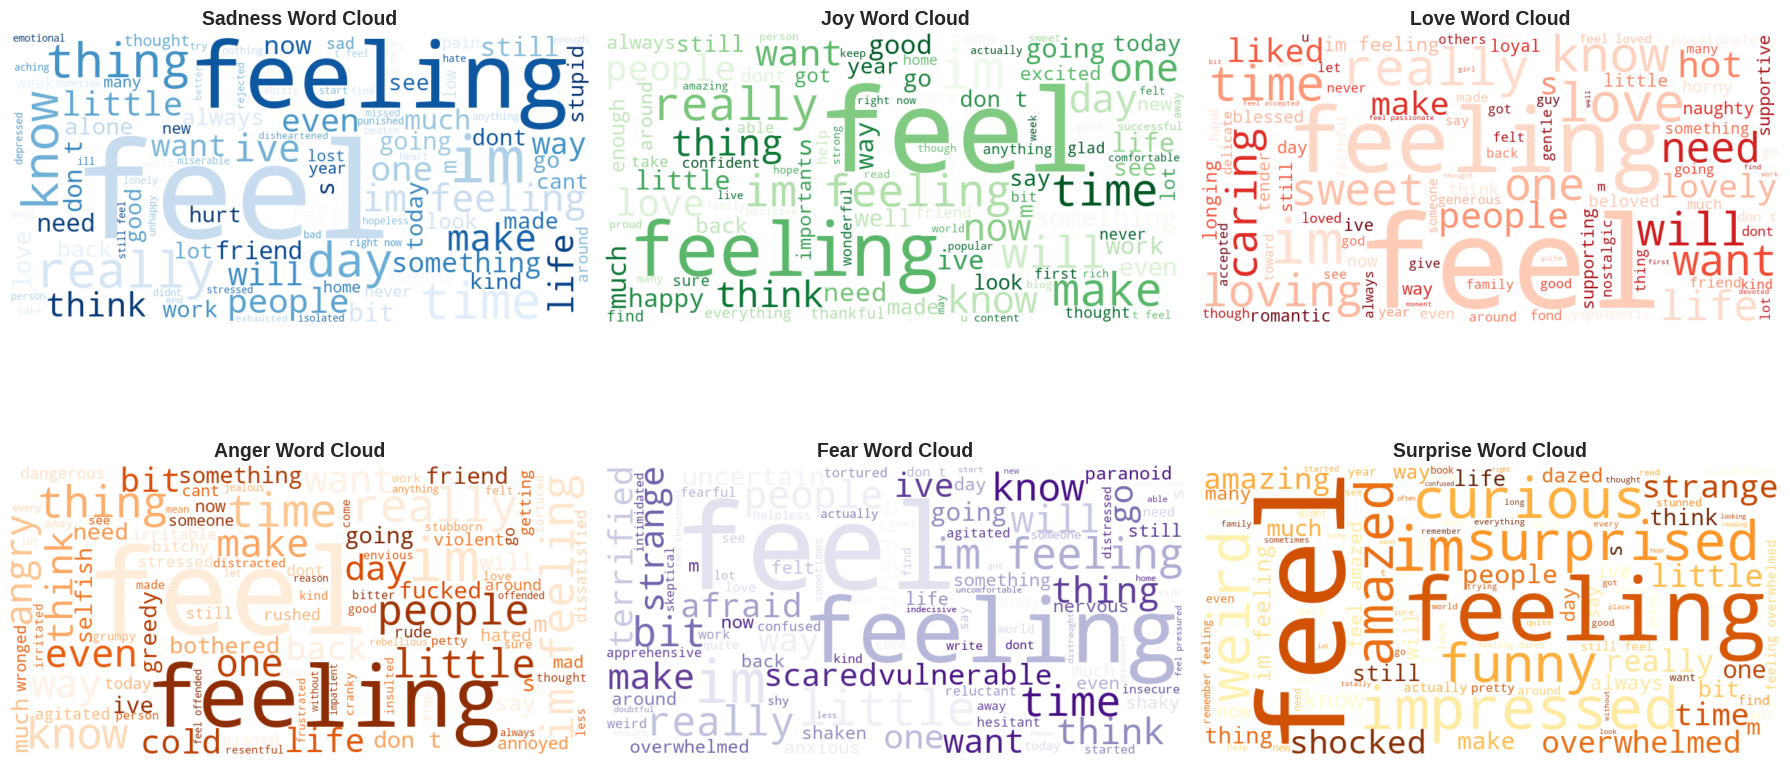

In [20]:
# Generate word clouds for each emotion
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

colors = ['Blues', 'Greens', 'Reds', 'Oranges', 'Purples', 'YlOrBr']

for idx, emotion in enumerate(emotion_mapping.values()):
    emotion_texts = df[df['emotion_name'] == emotion]['text']
    combined_text = ' '.join(emotion_texts)
    
    wordcloud = WordCloud(
        width=800, 
        height=400, 
        background_color='white',
        colormap=colors[idx],
        max_words=100
    ).generate(combined_text)
    
    axes[idx].imshow(wordcloud, interpolation='bilinear')
    axes[idx].set_title(f'{emotion} Word Cloud', fontsize=14, fontweight='bold')
    axes[idx].axis('off')

plt.tight_layout()
plt.show()


## 9. N-gram Analysis (Bigrams & Trigrams)


In [21]:
# Function to get n-grams
def get_ngrams(text_series, n=2, top_k=15):
    """Extract top k n-grams from text series"""
    all_ngrams = []
    for text in text_series:
        tokens = text.lower().split()
        text_ngrams = list(ngrams(tokens, n))
        all_ngrams.extend(text_ngrams)
    
    ngram_freq = Counter(all_ngrams)
    return ngram_freq.most_common(top_k)

# Get overall bigrams and trigrams
print("\n🔤 Top 15 Bigrams (2-word phrases):\n")
bigrams = get_ngrams(df['text'], n=2, top_k=15)
for i, (bigram, count) in enumerate(bigrams, 1):
    print(f"  {i:2d}. {' '.join(bigram):30s} - {count:5,} times")

print("\n🔤 Top 15 Trigrams (3-word phrases):\n")
trigrams = get_ngrams(df['text'], n=3, top_k=15)
for i, (trigram, count) in enumerate(trigrams, 1):
    print(f"  {i:2d}. {' '.join(trigram):40s} - {count:5,} times")



🔤 Top 15 Bigrams (2-word phrases):

   1. i feel                         - 6,997 times
   2. i am                           - 1,936 times
   3. feel like                      - 1,744 times
   4. i was                          - 1,322 times
   5. that i                         - 1,183 times
   6. i have                         - 1,136 times
   7. and i                          - 1,054 times
   8. im feeling                     -   801 times
   9. to be                          -   785 times
  10. to feel                        -   762 times
  11. feel so                        -   757 times
  12. of the                         -   719 times
  13. but i                          -   699 times
  14. in the                         -   695 times
  15. when i                         -   689 times

🔤 Top 15 Trigrams (3-word phrases):

   1. i feel like                              - 1,322 times
   2. i feel so                                -   563 times
   3. feel like i                     

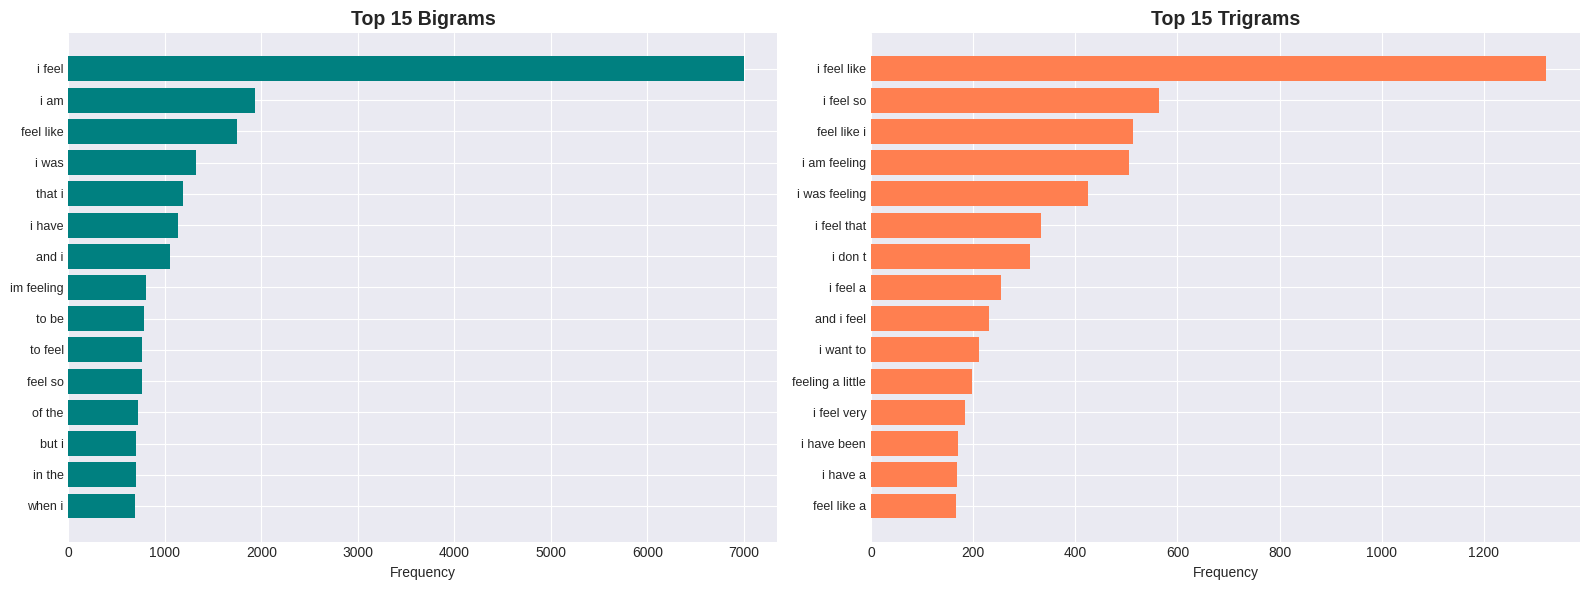

In [22]:
# Visualize bigrams and trigrams
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bigrams
bigram_labels = [' '.join(bg) for bg, _ in bigrams]
bigram_counts = [count for _, count in bigrams]
axes[0].barh(range(len(bigram_labels)), bigram_counts, color='teal')
axes[0].set_yticks(range(len(bigram_labels)))
axes[0].set_yticklabels(bigram_labels, fontsize=9)
axes[0].invert_yaxis()
axes[0].set_title('Top 15 Bigrams', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Frequency')

# Trigrams
trigram_labels = [' '.join(tg) for tg, _ in trigrams]
trigram_counts = [count for _, count in trigrams]
axes[1].barh(range(len(trigram_labels)), trigram_counts, color='coral')
axes[1].set_yticks(range(len(trigram_labels)))
axes[1].set_yticklabels(trigram_labels, fontsize=9)
axes[1].invert_yaxis()
axes[1].set_title('Top 15 Trigrams', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Frequency')

plt.tight_layout()
plt.show()


In [23]:
# Bigrams by emotion
print("\n🎯 Top 5 Bigrams by Emotion:\n")

for emotion in emotion_mapping.values():
    emotion_texts = df[df['emotion_name'] == emotion]['text']
    emotion_bigrams = get_ngrams(emotion_texts, n=2, top_k=5)
    
    print(f"\n{emotion}:")
    for i, (bigram, count) in enumerate(emotion_bigrams, 1):
        print(f"  {i}. {' '.join(bigram):25s} - {count:4,} times")



🎯 Top 5 Bigrams by Emotion:


Sadness:
  1. i feel                    - 2,075 times
  2. i am                      -  530 times
  3. feel like                 -  514 times
  4. i was                     -  416 times
  5. i have                    -  335 times

Joy:
  1. i feel                    - 2,485 times
  2. i am                      -  675 times
  3. feel like                 -  611 times
  4. i have                    -  415 times
  5. that i                    -  415 times

Love:
  1. i feel                    -  573 times
  2. feel like                 -  185 times
  3. i am                      -  157 times
  4. that i                    -  113 times
  5. to be                     -   96 times

Anger:
  1. i feel                    -  932 times
  2. i am                      -  255 times
  3. feel like                 -  253 times
  4. i was                     -  207 times
  5. that i                    -  155 times

Fear:
  1. i feel                    -  720 times
  2. i

## 10. Text Complexity & Diversity Metrics


In [24]:
# Calculate additional complexity metrics
print("\n📊 Text Complexity Metrics by Emotion:\n")

complexity_stats = df.groupby('emotion_name').agg({
    'text_length': 'mean',
    'word_count': 'mean',
    'avg_word_length': 'mean',
    'unique_words': 'mean',
    'unique_word_ratio': 'mean'
}).round(2)

display(complexity_stats)



📊 Text Complexity Metrics by Emotion:



,text_length,word_count,avg_word_length,unique_words,unique_word_ratio
emotion_name,,,,,
Anger,96.91,19.23,4.15,16.93,0.91
Fear,96.12,18.84,4.23,16.74,0.92
Joy,98.55,19.50,4.14,17.29,0.91
Love,104.03,20.70,4.10,18.20,0.91
Sadness,92.55,18.36,4.15,16.25,0.92
Surprise,101.68,19.97,4.18,17.69,0.91


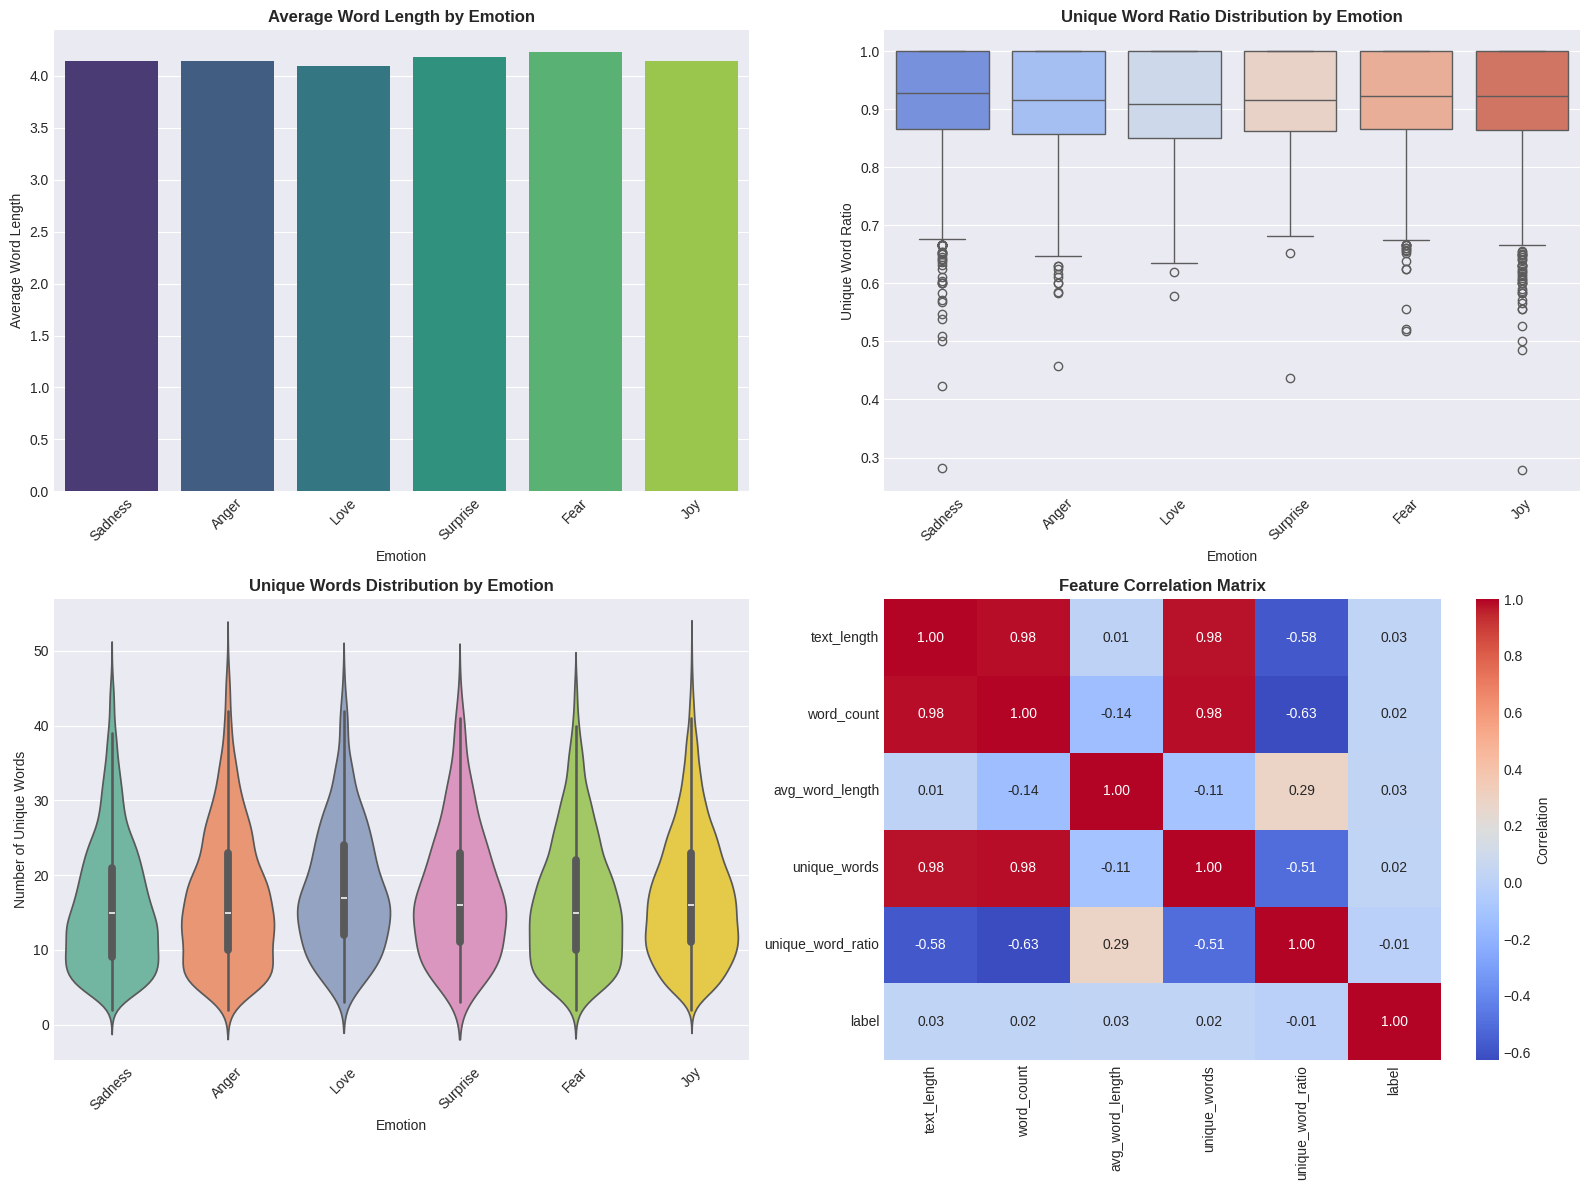

In [25]:
# Visualize text complexity metrics
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Average word length by emotion
sns.barplot(data=df, x='emotion_name', y='avg_word_length', ax=axes[0, 0], 
            palette='viridis', estimator=np.mean, ci=None)
axes[0, 0].set_title('Average Word Length by Emotion', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Emotion')
axes[0, 0].set_ylabel('Average Word Length')
axes[0, 0].tick_params(axis='x', rotation=45)

# Unique word ratio by emotion
sns.boxplot(data=df, x='emotion_name', y='unique_word_ratio', ax=axes[0, 1], palette='coolwarm')
axes[0, 1].set_title('Unique Word Ratio Distribution by Emotion', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Emotion')
axes[0, 1].set_ylabel('Unique Word Ratio')
axes[0, 1].tick_params(axis='x', rotation=45)

# Unique words by emotion
sns.violinplot(data=df, x='emotion_name', y='unique_words', ax=axes[1, 0], palette='Set2')
axes[1, 0].set_title('Unique Words Distribution by Emotion', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Emotion')
axes[1, 0].set_ylabel('Number of Unique Words')
axes[1, 0].tick_params(axis='x', rotation=45)

# Correlation heatmap
numeric_cols = ['text_length', 'word_count', 'avg_word_length', 'unique_words', 'unique_word_ratio', 'label']
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', ax=axes[1, 1], 
            cbar_kws={'label': 'Correlation'})
axes[1, 1].set_title('Feature Correlation Matrix', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


## 11. Sample Text Inspection


In [26]:
# Display sample texts from each emotion
print("\n📝 Sample Texts by Emotion (5 examples per emotion):\n")

for emotion in emotion_mapping.values():
    print(f"\n{'='*80}")
    print(f"{emotion.upper()}")
    print('='*80)
    
    samples = df[df['emotion_name'] == emotion]['text'].sample(n=5, random_state=42)
    
    for i, text in enumerate(samples, 1):
        print(f"\n{i}. {text}")



📝 Sample Texts by Emotion (5 examples per emotion):


SADNESS

1. im feeling so lousy they tried to cheer me up during school time and during choir practice

2. i feel highly disadvantaged

3. i feel humiliated to introduce you to my colleagues as my wife

4. i feel so worthless during those times i was struggling finding work

5. i still miss him and feel rather weepy today

JOY

1. i feel im rather innocent in that respect

2. im feeling quite adventurous and tried out those drinks that i just normally read through the pages of pocketbooks

3. im feeling much more positive about the impending move

4. i feel like i spend most of my time over thinking and over analyzing pretty much everything

5. i suspect those might also be factors in making him not feel rich

LOVE

1. i mean fuck i feel like i was way more considerate with customers and concerned about appearance and sanitiation snoozel pm but fine

2. i remember a couple of years ago i was feeling romantic and dreamy and asked hi

In [27]:
# Find longest and shortest texts
print("\n📏 Text Length Extremes:\n")

# Longest texts
print("\n🔹 Top 3 Longest Texts:\n")
longest_texts = df.nlargest(3, 'text_length')[['text', 'emotion_name', 'text_length', 'word_count']]
for idx, row in longest_texts.iterrows():
    print(f"Emotion: {row['emotion_name']}")
    print(f"Length: {row['text_length']} chars, {row['word_count']} words")
    print(f"Text: {row['text']}")
    print()

# Shortest texts
print("\n🔹 Top 3 Shortest Texts:\n")
shortest_texts = df.nsmallest(3, 'text_length')[['text', 'emotion_name', 'text_length', 'word_count']]
for idx, row in shortest_texts.iterrows():
    print(f"Emotion: {row['emotion_name']}")
    print(f"Length: {row['text_length']} chars, {row['word_count']} words")
    print(f"Text: {row['text']}")
    print()



📏 Text Length Extremes:


🔹 Top 3 Longest Texts:

Emotion: Joy
Length: 300 chars, 62 words
Text: i hope that those of you who actauly found this and read it feel possibly inspired to go out and buy some of these items or even go through storage and see what clothes of yours your mom saved and that you still have a hope of fitting in and mix up your wardrobe for this summer and have a little fun

Emotion: Sadness
Length: 299 chars, 55 words
Text: i hadn t seen for two years spending a sun filled day at the aussie open followed by dumplings at chinatown and a lemonade in a leafy beer garden feeling like i had stepped back in time at labour in vain on brunswick street attending a backyard barbecue and visiting edinburgh gardens for aussie day

Emotion: Love
Length: 299 chars, 62 words
Text: i like to add a slice of cheese and some pepper to the egg and when i am feeling naughty i like to add some chocolate chips to my trail mix another treat i am loving as a pregnant mom who often craves

## 12. Stopwords Analysis


In [28]:
# Analyze stopwords presence
stop_words = set(stopwords.words('english'))

def count_stopwords(text):
    words = text.lower().split()
    return sum(1 for word in words if word in stop_words)

df['stopword_count'] = df['text'].apply(count_stopwords)
df['stopword_ratio'] = df['stopword_count'] / df['word_count']

print("\n🛑 Stopword Statistics:")
print(f"  Average stopwords per text: {df['stopword_count'].mean():.2f}")
print(f"  Average stopword ratio: {df['stopword_ratio'].mean():.2%}")

print("\n📊 Stopword Statistics by Emotion:")
stopword_stats = df.groupby('emotion_name')[['stopword_count', 'stopword_ratio']].mean().round(3)
display(stopword_stats)



🛑 Stopword Statistics:
  Average stopwords per text: 9.81
  Average stopword ratio: 49.22%

📊 Stopword Statistics by Emotion:


,stopword_count,stopword_ratio
emotion_name,,
Anger,9.907,0.494
Fear,9.644,0.491
Joy,9.979,0.494
Love,10.765,0.505
Sadness,9.332,0.486
Surprise,10.231,0.492


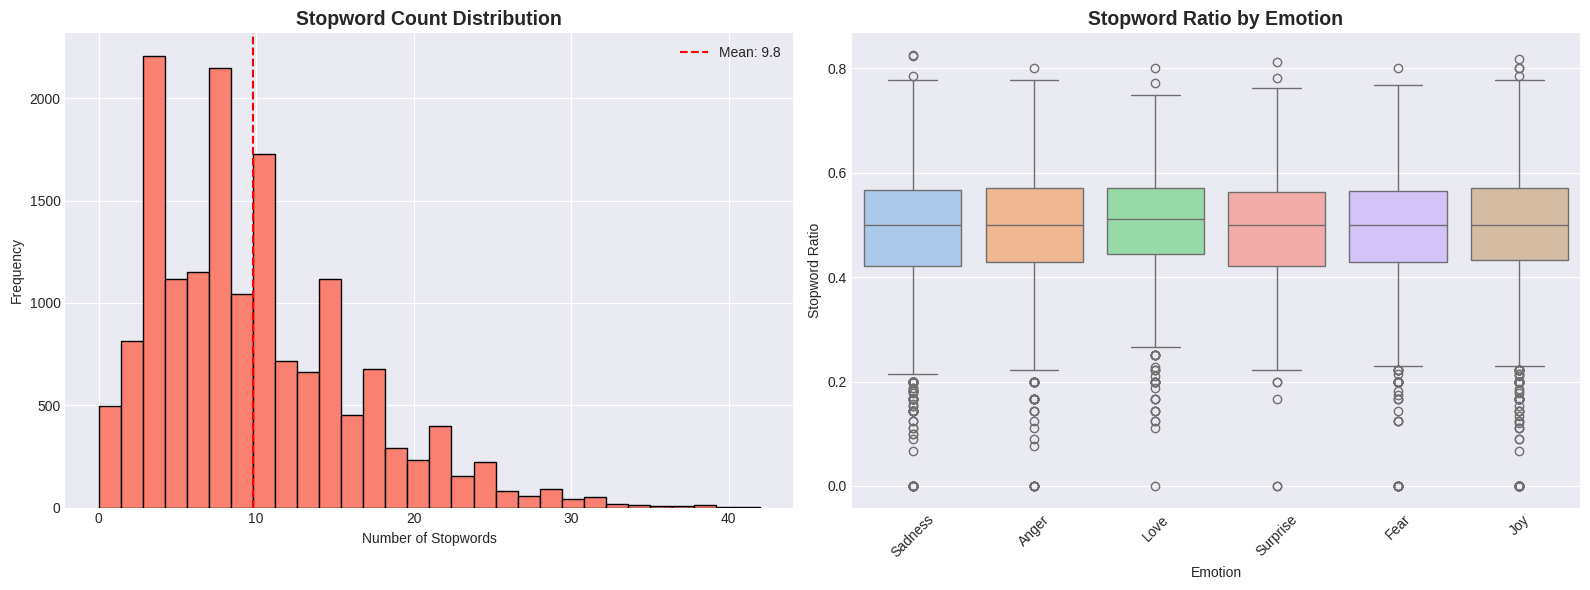

In [29]:
# Visualize stopword distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Stopword count distribution
axes[0].hist(df['stopword_count'], bins=30, color='salmon', edgecolor='black')
axes[0].set_title('Stopword Count Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Number of Stopwords')
axes[0].set_ylabel('Frequency')
axes[0].axvline(df['stopword_count'].mean(), color='red', linestyle='--', 
                label=f"Mean: {df['stopword_count'].mean():.1f}")
axes[0].legend()

# Stopword ratio by emotion
sns.boxplot(data=df, x='emotion_name', y='stopword_ratio', ax=axes[1], palette='pastel')
axes[1].set_title('Stopword Ratio by Emotion', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Emotion')
axes[1].set_ylabel('Stopword Ratio')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## 13. Key Insights & Summary


In [30]:
# Generate comprehensive summary
print("\n" + "="*80)
print("📊 EDA SUMMARY - KEY INSIGHTS")
print("="*80)

print(f"\n1️⃣ DATASET OVERVIEW:")
print(f"   • Total samples: {len(df):,}")
print(f"   • Number of emotions: {df['label'].nunique()}")
print(f"   • Missing values: {df.isnull().sum().sum()}")
print(f"   • Duplicate rows: {duplicates:,} ({duplicates/len(df)*100:.2f}%)")

print(f"\n2️⃣ CLASS DISTRIBUTION:")
for emotion, count in class_counts.items():
    print(f"   • {emotion:10s}: {count:6,} ({count/len(df)*100:5.2f}%)")
print(f"   • Class imbalance ratio: {max_ratio:.2f}")

print(f"\n3️⃣ TEXT STATISTICS:")
print(f"   • Average text length: {df['text_length'].mean():.1f} characters")
print(f"   • Average word count: {df['word_count'].mean():.1f} words")
print(f"   • Average word length: {df['avg_word_length'].mean():.2f} characters")
print(f"   • Text length range: {df['text_length'].min()} - {df['text_length'].max()} characters")
print(f"   • Word count range: {df['word_count'].min()} - {df['word_count'].max()} words")

print(f"\n4️⃣ VOCABULARY:")
print(f"   • Total words: {total_words:,}")
print(f"   • Unique words: {unique_words:,}")
print(f"   • Vocabulary richness: {vocab_richness:.4f}")
print(f"   • Average unique word ratio per text: {df['unique_word_ratio'].mean():.3f}")

print(f"\n5️⃣ STOPWORDS:")
print(f"   • Average stopwords per text: {df['stopword_count'].mean():.2f}")
print(f"   • Average stopword ratio: {df['stopword_ratio'].mean():.2%}")

print(f"\n6️⃣ RECOMMENDATIONS FOR PREPROCESSING:")
print(f"   ✓ Remove stopwords (they comprise ~{df['stopword_ratio'].mean():.0%} of text)")
print(f"   ✓ Consider handling duplicates ({duplicates} found)")
print(f"   ✓ Text length varies significantly - consider padding/truncation")
if max_ratio > 3:
    print(f"   ⚠ Handle class imbalance (ratio: {max_ratio:.2f}) - consider class weights")
print(f"   ✓ Vocabulary size ({unique_words:,}) suggests embeddings dimension 50-300")

print(f"\n7️⃣ MODELING RECOMMENDATIONS:")
print(f"   • Suggested max sequence length: {int(df['word_count'].quantile(0.95))} words (95th percentile)")
print(f"   • Embedding dimension: 100-300 (given vocabulary size)")
print(f"   • Consider using pre-trained embeddings (GloVe, Word2Vec)")
print(f"   • Use dropout and regularization (high vocabulary richness)")

print("\n" + "="*80)
print("✅ EDA COMPLETED SUCCESSFULLY")
print("="*80)



📊 EDA SUMMARY - KEY INSIGHTS

1️⃣ DATASET OVERVIEW:
   • Total samples: 16,000
   • Number of emotions: 6
   • Missing values: 0
   • Duplicate rows: 1 (0.01%)

2️⃣ CLASS DISTRIBUTION:
   • Anger     :  2,159 (13.49%)
   • Fear      :  1,937 (12.11%)
   • Joy       :  5,362 (33.51%)
   • Love      :  1,304 ( 8.15%)
   • Sadness   :  4,666 (29.16%)
   • Surprise  :    572 ( 3.57%)
   • Class imbalance ratio: 9.37

3️⃣ TEXT STATISTICS:
   • Average text length: 96.8 characters
   • Average word count: 19.2 words
   • Average word length: 4.15 characters
   • Text length range: 7 - 300 characters
   • Word count range: 2 - 66 words

4️⃣ VOCABULARY:
   • Total words: 306,661
   • Unique words: 15,212
   • Vocabulary richness: 0.0496
   • Average unique word ratio per text: 0.914

5️⃣ STOPWORDS:
   • Average stopwords per text: 9.81
   • Average stopword ratio: 49.22%

6️⃣ RECOMMENDATIONS FOR PREPROCESSING:
   ✓ Remove stopwords (they comprise ~49% of text)
   ✓ Consider handling duplicate